# Applied Data Science Capstone Project #

## Predicting Accident Severity ##

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import itertools
import sklearn
import matplotlib.ticker as ticker

from sklearn import metrics
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [36]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

C:\Users\Hemant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
df2=df.drop(columns=['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'])

In [9]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,NaN,N
1,1,Block,Sideswipe,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,4,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,NaN,N
4,2,Intersection,Angles,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,NaN,N


In [42]:
df3=df2.dropna()
df3['UNDERINFL'].replace(to_replace=['0','1'], value=['N','Y'],inplace=True)

C:\Users\Hemant\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 24 to 194549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SEVERITYCODE   9193 non-null   int64 
 1   ADDRTYPE       9193 non-null   object
 2   COLLISIONTYPE  9193 non-null   object
 3   PERSONCOUNT    9193 non-null   int64 
 4   INCDATE        9193 non-null   object
 5   INCDTTM        9193 non-null   object
 6   JUNCTIONTYPE   9193 non-null   object
 7   UNDERINFL      9193 non-null   object
 8   WEATHER        9193 non-null   object
 9   ROADCOND       9193 non-null   object
 10  LIGHTCOND      9193 non-null   object
 11  SPEEDING       9193 non-null   object
 12  HITPARKEDCAR   9193 non-null   object
dtypes: int64(2), object(11)
memory usage: 1005.5+ KB


In [12]:
df3.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
INCDATE          0
INCDTTM          0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SPEEDING         0
HITPARKEDCAR     0
dtype: int64

In [43]:
df3.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
24,2,Intersection,Rear Ended,3,2013/03/31 00:00:00+00,3/31/2013 10:05:00 AM,At Intersection (intersection related),N,Clear,Dry,Daylight,Y,N
43,2,Block,Other,1,2006/09/13 00:00:00+00,9/13/2006 10:46:00 PM,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,Y,N
62,1,Block,Parked Car,4,2004/06/24 00:00:00+00,6/24/2004 7:43:00 PM,Mid-Block (but intersection related),N,Clear,Dry,Daylight,Y,N
123,1,Block,Rear Ended,2,2004/03/05 00:00:00+00,3/5/2004,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,Y,N
124,2,Intersection,Angles,2,2013/03/29 00:00:00+00,3/29/2013 4:34:00 PM,At Intersection (intersection related),Y,Clear,Dry,Daylight,Y,N


In [48]:
# Copy dataframe
df4=df3[:]
# Change datatype from object to category
df4["ADDRTYPE"] = df4["ADDRTYPE"].astype('category')
df4["COLLISIONTYPE"] = df4["COLLISIONTYPE"].astype('category')
df4["JUNCTIONTYPE"] = df4["JUNCTIONTYPE"].astype('category')
df4["UNDERINFL"] = df4["UNDERINFL"].astype('category')
df4["WEATHER"] = df4["WEATHER"].astype('category')
df4["ROADCOND"] = df4["ROADCOND"].astype('category')
df4["LIGHTCOND"] = df4["LIGHTCOND"].astype('category')
df4["SPEEDING"] = df4["SPEEDING"].astype('category')
df4["HITPARKEDCAR"] = df4["HITPARKEDCAR"].astype('category')

In [49]:
# Change categories to numerical values
df4["ADDRTYPE"] = df4["ADDRTYPE"].cat.codes
df4["COLLISIONTYPE"] = df4["COLLISIONTYPE"].cat.codes
df4["JUNCTIONTYPE"] = df4["JUNCTIONTYPE"].cat.codes
df4["UNDERINFL"] = df4["UNDERINFL"].cat.codes
df4["WEATHER"] = df4["WEATHER"].cat.codes
df4["ROADCOND"] = df4["ROADCOND"].cat.codes
df4["LIGHTCOND"] = df4["LIGHTCOND"].cat.codes
df4["SPEEDING"] = df4["SPEEDING"].cat.codes
df4["HITPARKEDCAR"] = df4["HITPARKEDCAR"].cat.codes

In [50]:
df4.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
24,2,2,7,3,2013/03/31 00:00:00+00,3/31/2013 10:05:00 AM,1,0,1,0,4,0,0
43,2,1,4,1,2006/09/13 00:00:00+00,9/13/2006 10:46:00 PM,4,0,5,8,2,0,0
62,1,1,5,4,2004/06/24 00:00:00+00,6/24/2004 7:43:00 PM,3,0,1,0,4,0,0
123,1,1,7,2,2004/03/05 00:00:00+00,3/5/2004,4,0,5,8,4,0,0
124,2,2,0,2,2013/03/29 00:00:00+00,3/29/2013 4:34:00 PM,1,1,1,0,4,0,0


In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 24 to 194549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SEVERITYCODE   9193 non-null   int64 
 1   ADDRTYPE       9193 non-null   int8  
 2   COLLISIONTYPE  9193 non-null   int8  
 3   PERSONCOUNT    9193 non-null   int64 
 4   INCDATE        9193 non-null   object
 5   INCDTTM        9193 non-null   object
 6   JUNCTIONTYPE   9193 non-null   int8  
 7   UNDERINFL      9193 non-null   int8  
 8   WEATHER        9193 non-null   int8  
 9   ROADCOND       9193 non-null   int8  
 10  LIGHTCOND      9193 non-null   int8  
 11  SPEEDING       9193 non-null   int8  
 12  HITPARKEDCAR   9193 non-null   int8  
dtypes: int64(2), int8(9), object(2)
memory usage: 439.9+ KB


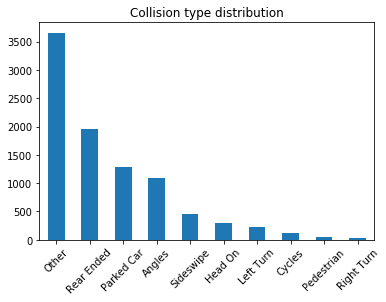

In [52]:
df3['COLLISIONTYPE'].value_counts().plot(kind='bar')
plt.title('Collision type distribution')
plt.xticks(rotation=45)
plt.show()

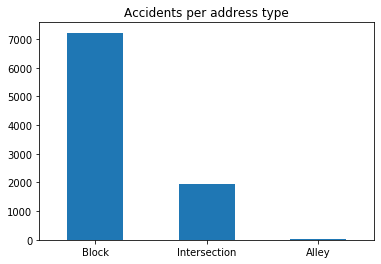

In [27]:
df3['ADDRTYPE'].value_counts().plot(kind='bar')
plt.title('Accidents per address type')
plt.xticks(rotation=0)
plt.show()

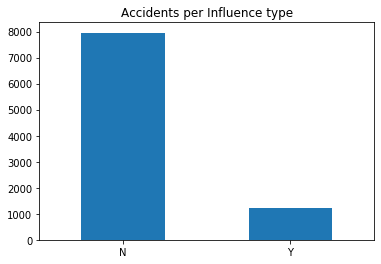

In [53]:
df3['UNDERINFL'].value_counts().plot(kind='bar')
plt.title('Accidents per Influence type')
plt.xticks(rotation=0)
plt.show()

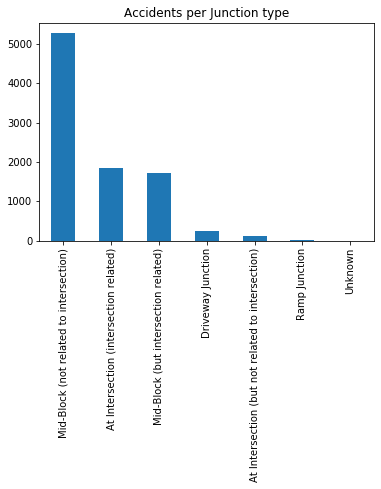

In [65]:
df3['JUNCTIONTYPE'].value_counts().plot(kind='bar')
plt.title('Accidents per Junction type')
plt.xticks(rotation=90)
plt.show()

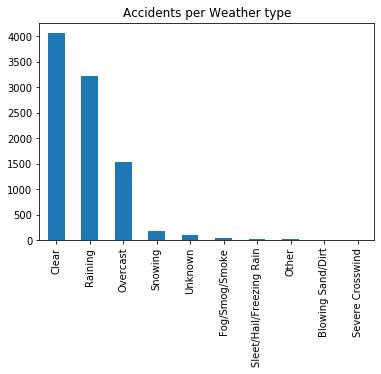

In [60]:
df3['WEATHER'].value_counts().plot(kind='bar')
plt.title('Accidents per Weather type')
plt.xticks(rotation=90)
plt.show()

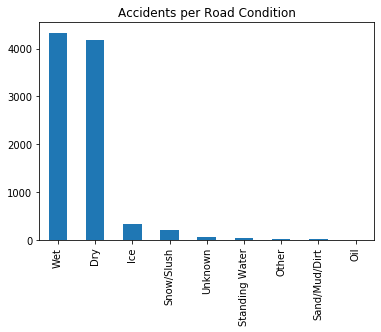

In [70]:
df3['ROADCOND'].value_counts().plot(kind='bar')
plt.title('Accidents per Road Condition')
plt.xticks(rotation=90)
plt.show()

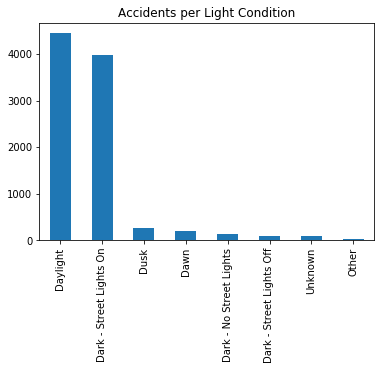

In [71]:
df3['LIGHTCOND'].value_counts().plot(kind='bar')
plt.title('Accidents per Light Condition')
plt.xticks(rotation=90)
plt.show()

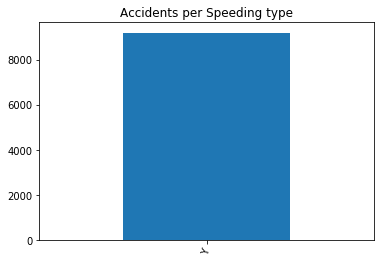

In [69]:
df3['SPEEDING'].value_counts().plot(kind='bar')
plt.title('Accidents per Speeding type')
plt.xticks(rotation=70)
plt.show()

In [73]:
# Dropping label column and date attributes, date attributes might be revisited
# in a later iteration of this project.
X= df4.drop(['SEVERITYCODE','INCDATE','INCDTTM'], axis=1)
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
24,2,7,3,1,0,1,0,4,0,0
43,1,4,1,4,0,5,8,2,0,0
62,1,5,4,3,0,1,0,4,0,0
123,1,7,2,4,0,5,8,4,0,0
124,2,0,2,1,1,1,0,4,0,0


In [74]:
Y= df4['SEVERITYCODE'].values
Y

array([2, 2, 1, ..., 2, 1, 1], dtype=int64)

In [75]:
# Splitting test set(20%) and train set(80%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train set shape:', X_train.shape, y_train.shape)

Train set shape: (7354, 10) (7354,)


### kNN Algorithm ###

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
from sklearn.neighbors import KNeighborsClassifier
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
      
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    predKNN = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(predKNN==y_test);
    
    std_acc[n-1]=np.std(predKNN==y_test)/np.sqrt(predKNN.shape[0])
mean_acc

array([0.58618815, 0.6286025 , 0.59869494, 0.63349647, 0.63512779,
       0.64654704, 0.63839043, 0.64274062, 0.63295269, 0.63730288,
       0.63512779, 0.63839043, 0.63458401, 0.64274062, 0.651441  ,
       0.6389342 , 0.62588363, 0.63186514, 0.62425231])

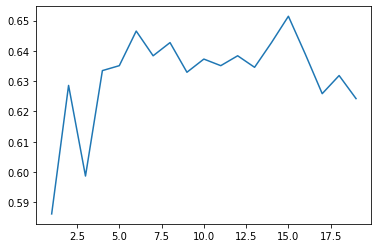

In [105]:
n=list(range(1,Ks))
plt.plot(n, mean_acc)
plt.xlabel=('N Neighbors')
plt.ylabel=('Accuracy')

In [123]:
from sklearn import metrics
k = 6
best_kNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
best_kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [124]:
predKNN = best_kNN_model.predict(X_test)

In [125]:
print (predKNN[0:5])
print (y_test[0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predKNN))

[2 1 1 1 1]
[2 1 2 1 1]
DecisionTrees's Accuracy:  0.646547036432844


### Decision Tree ###

In [111]:
from sklearn.tree import DecisionTreeClassifier
bestDT= []
l=20
for m in range(1,l):

    DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    DT_model.fit(X_train,y_train)
    predDT = DT_model.predict(X_test)
    print("DecisionTrees's Accuracy for k: ",m," | is: ", metrics.accuracy_score(y_test, predDT))
    bestDT.append(metrics.accuracy_score(y_test, predDT))

DecisionTrees's Accuracy for k:  1  | is:  0.6150081566068516
DecisionTrees's Accuracy for k:  2  | is:  0.6204458945078847
DecisionTrees's Accuracy for k:  3  | is:  0.6405655247417075
DecisionTrees's Accuracy for k:  4  | is:  0.6334964654703643
DecisionTrees's Accuracy for k:  5  | is:  0.6421968461120174
DecisionTrees's Accuracy for k:  6  | is:  0.6427406199021207
DecisionTrees's Accuracy for k:  7  | is:  0.6443719412724307
DecisionTrees's Accuracy for k:  8  | is:  0.643284393692224
DecisionTrees's Accuracy for k:  9  | is:  0.6427406199021207
DecisionTrees's Accuracy for k:  10  | is:  0.6470908102229472
DecisionTrees's Accuracy for k:  11  | is:  0.6443719412724307
DecisionTrees's Accuracy for k:  12  | is:  0.6383904295812942
DecisionTrees's Accuracy for k:  13  | is:  0.6318651441000543
DecisionTrees's Accuracy for k:  14  | is:  0.6427406199021207
DecisionTrees's Accuracy for k:  15  | is:  0.6394779771615008
DecisionTrees's Accuracy for k:  16  | is:  0.6383904295812942
De

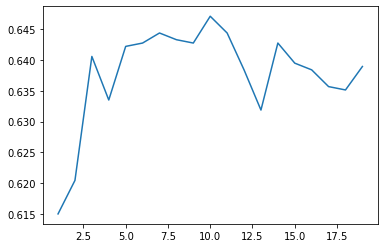

In [112]:
n=list(range(1,l))
fig=plt.plot(n, bestDT)

In [126]:
#choosing the max depth as 7 in decision trees.
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT_model.fit(X_train,y_train)
DT_model
predDT = DT_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predDT))

DecisionTrees's Accuracy:  0.6460032626427407


### Support Vector Machine ###

In [116]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)
predSVM = SVM_model.predict(X_test)
print (predSVM[0:5])
print (y_test[0:5])
print("SupportVectorMachine's Accuracy: ", metrics.accuracy_score(y_test, predSVM))

[2 1 1 1 1]
[2 1 2 1 1]
SupportVectorMachine's Accuracy:  0.6318651441000543


### Logistic Regression ###

In [117]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
predLR = LR_model.predict(X_test)
print (predLR [0:5])
print (y_test [0:5])
print("Support Vector Machines's Accuracy: ", metrics.accuracy_score(y_test, predLR))

[2 1 1 1 1]
[2 1 2 1 1]
Support Vector Machines's Accuracy:  0.6324089178901577


In [118]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [127]:
jac_knn = jaccard_similarity_score(y_test, predKNN)
jac_tree = jaccard_similarity_score(y_test, predDT)
jac_svm = jaccard_similarity_score(y_test, predSVM)
jac_lr = jaccard_similarity_score(y_test, predLR)
jac = jac_knn, jac_tree, jac_svm, jac_lr

C:\Users\Hemant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [128]:
f1_knn = f1_score(y_test, predKNN, average='weighted')
f1_tree = f1_score(y_test, predDT, average='weighted')
f1_svm = f1_score(y_test, predSVM, average='weighted')
f1_lr = f1_score(y_test, predLR, average='weighted')
f1 = f1_knn, f1_tree, f1_svm, f1_lr

In [129]:
prob_knn = LR_model.predict_proba(X_test)
log_lr = log_loss(y_test, prob_knn)
log_lr

0.6500218413103355

In [130]:
df = pd.DataFrame({"Algorithm" : ["KNN", "Decision Tree", "SVM", "Logistic Regression"], "Jaccard": [jac_knn, jac_tree, jac_svm, jac_lr], "F1-score": [f1_knn, f1_tree, f1_svm, f1_lr], "Log-Loss": ["N/A", "N/A", "N/A", log_lr]})

df

,Algorithm,Jaccard,F1-score,Log-Loss
0,KNN,0.646547,0.606436,N/A
1,Decision Tree,0.646003,0.623560,N/A
2,SVM,0.631865,0.569935,N/A
3,Logistic Regression,0.632409,0.568373,0.650022
